In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #載入skl的資料分割模組
from sklearn.neighbors import KNeighborsClassifier #載入skl的KNN
import matplotlib.pyplot as plt

In [2]:
hero_data = pd.read_json("./Hero_Data.json")
hd = pd.DataFrame(hero_data,dtype=float)
# print(hd)
# print(hd.columns)

In [3]:
hd.info()
hd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
攻擊力     134 non-null float64
攻擊成長    134 non-null float64
攻擊範圍    134 non-null float64
攻擊速度    134 non-null float64
攻速成長    134 non-null float64
生命值     134 non-null float64
生命成長    134 non-null float64
移動速度    134 non-null float64
護甲      134 non-null float64
護甲成長    134 non-null float64
魔抗成長    134 non-null float64
魔法抗性    134 non-null float64
dtypes: float64(12)
memory usage: 12.6 KB


,攻擊力,攻擊成長,攻擊範圍,攻擊速度,攻速成長,生命值,生命成長,移動速度,護甲,護甲成長,魔抗成長,魔法抗性
0,60.000,2.800,0.0,0.669,2.70,585.0,85.0,340.0,29.000,3.30,1.25,32.100
1,62.000,3.500,0.0,0.635,1.90,510.0,85.0,335.0,24.000,3.90,0.00,30.000
2,56.000,2.200,1.0,0.625,2.06,545.0,80.0,325.0,24.000,3.00,0.00,30.000
3,55.000,3.000,0.0,0.625,2.50,400.0,65.0,345.0,26.000,4.00,1.25,32.100
4,50.000,3.000,0.0,0.625,2.80,580.0,74.0,330.0,22.000,3.50,1.25,30.000
5,50.000,3.000,0.0,0.625,2.80,580.0,74.0,330.0,22.000,3.50,1.25,30.000
6,56.000,3.300,0.0,0.625,1.12,500.0,75.0,325.0,20.000,3.00,0.00,30.000
7,57.000,3.200,1.0,0.625,1.00,550.0,80.0,325.0,19.000,3.60,0.00,30.000
8,53.000,3.100,1.0,0.625,0.00,540.0,85.0,325.0,20.000,3.50,0.00,30.000
9,60.000,5.000,0.0,0.571,2.50,585.6,95.0,340.0,26.000,3.80,1.25,32.100


In [4]:
from sklearn import preprocessing #載入資料標準化模組
from sklearn.model_selection import cross_val_score #載入交叉驗證模組
from sklearn.metrics.pairwise import euclidean_distances #載入計算特徵距離模組

hero_x = hd.iloc[0:,1:] #選擇input
hero_y = hd.iloc[:,2:3] #選擇target
hero_y = np.ravel(hero_y) #把target攤平,以便閱讀測試結果

print(euclidean_distances(hero_x, hero_x)) #印出各特徵的相對距離,此資料是以array的型式產生

[[  0.          75.38211761  43.39163555 ...  38.4940302   10.69815292
  151.42058269]
 [ 75.38211761   0.          36.79029356 ...  42.8977007   75.53654149
   76.21856877]
 [ 43.39163555  36.79029356   0.         ...  23.30756798  41.69690636
  110.48766549]
 ...
 [ 38.4940302   42.8977007   23.30756798 ...   0.          37.56764599
  117.06537703]
 [ 10.69815292  75.53654149  41.69690636 ...  37.56764599   0.
  150.89102202]
 [151.42058269  76.21856877 110.48766549 ... 117.06537703 150.89102202
    0.        ]]


0.9512195121951219
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]


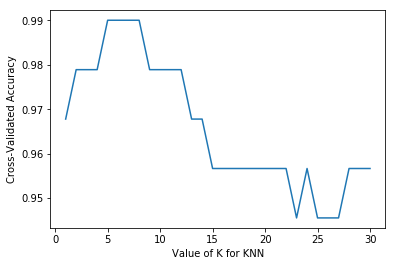

In [5]:
x = preprocessing.scale(hero_x) #對input做標準化
x_train, x_test, y_train, y_test = train_test_split(x, hero_y, test_size=0.3) #資料分割
knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(x_train, y_train) 
print(knn.score(x_test,y_test))
print(knn.predict(x_test))
print(y_test)

k_range = range(1,31)
k_scores = []
for k_number in k_range: #n_neighbors=1~30的準確率
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy') #做交叉驗證
    k_scores.append(scores.mean()) #把每次更新參數的準確值平均加進list,以便繪圖

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [6]:
#單變量特徵選擇-卡方檢驗
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

x_chi2 = SelectKBest(chi2, k=5).fit_transform(hero_x, hero_y) #參數K可以指定特徵數量
x_chi2.shape

(134, 5)

0.9512195121951219
[0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]


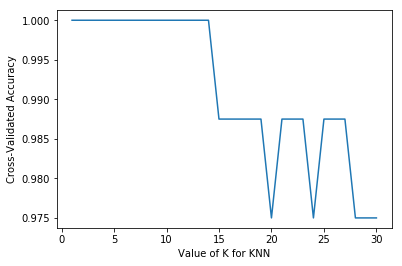

In [7]:
x_chi2 = preprocessing.scale(x_chi2)
x_train, x_test, y_train, y_test = train_test_split(x_chi2, hero_y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
print(knn.score(x_test,y_test))
print(knn.predict(x_test))
print(y_test)

k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [8]:
#去除低方差特徵
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8))) #特徵的方差若低於threshold的參數就會被移除

X_sel=sel.fit_transform(hero_x)
X_sel.shape

(134, 10)

0.975609756097561
[0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]


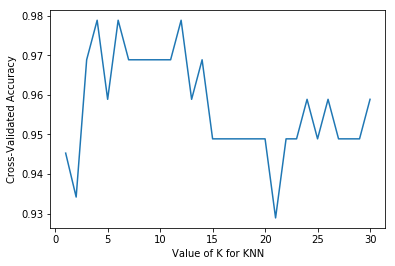

In [9]:
X_sel = preprocessing.scale(X_sel)
x_train, x_test, y_train, y_test = train_test_split(X_sel, hero_y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
print(knn.score(x_test,y_test))
print(knn.predict(x_test))
print(y_test)

k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [10]:
#基於L1的特徵選擇
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
#載入LinearSVC模組做特徵選擇

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(hero_x, hero_y)
model = SelectFromModel(lsvc, prefit=True)
X_lsvc = model.transform(hero_x)
X_lsvc.shape

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(134, 5)

1.0
[0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


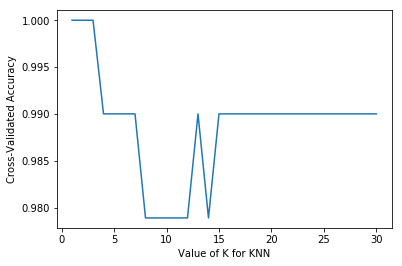

In [11]:
X_lsvc = preprocessing.scale(X_lsvc)
x_train, x_test, y_train, y_test = train_test_split(X_lsvc, hero_y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
print(knn.score(x_test,y_test))
print(knn.predict(x_test))
print(y_test)

k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel 

clf = ExtraTreesClassifier(n_estimators=50) #決定tree的數量
clf = clf.fit(hero_x, hero_y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(hero_x)
X_new.shape     

(134, 2)